<a href="https://colab.research.google.com/github/JennEYoon/geo-ml/blob/main/data_load_test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Load Test 3 (gdrive)    
env:   
date: 7/26 10 am  
author: Jennifer Yoon  
desc: using fastai to load data, try PLANET_TINY fastai source data  

### S0a. Setup for working locally  
Ubuntu WSL, conda env "fastai20"    
Python v 3.6, jupyter lab/nb, pytorch 1.7,   
nbdev 1.1, need nbdev for viewing docs    

In [1]:
# import data science libaries into each alias namespace  
from PIL import Image
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline  
%load_ext autoreload
%autoreload 2    
# auto-reload all external modules

np.random.seed(42)  # set seed for numpy.random 

In [ ]:
# name.<shift+tab>  # dot+shift+tab to view optioninfo.


In [3]:
# test versions, python, pytorch, nbdev
!python --version  # v3.7.11 Colab
import torch; print(torch.__version__)  # v1.9.0
# import nbdev; print(nbdev.__version__)  # not installed

Python 3.7.11
1.9.0+cu102


In [ ]:
# dir() to see data science lib namespace
#dir()

In [4]:
# Load fastai library, book contents  
# install and import fastbook contents 
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 46.6 MB/s 
     |████████████████████████████████| 188 kB 48.0 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 51 kB 304 kB/s 
Mounted at /content/gdrive


In [5]:
# import fastbook contents
from fastbook import *

# import all vision library namespace  
from fastai.vision.all import *

# alternate vision library import statement  
#from fastai.vision import *

In [ ]:
#dir()  # prints all fastai vision imported namespace

### S0b. Setup for working in Colab  

 * mount gdrive  
 * run fastbook install codes, import fastbook, call setup  
 * from pathlib import Path (if "Path" object didn't get imported with fastbook import).  
 * somehow upload data folder to gdrive or to Colab instance \contents\gdrive\ path  
 * set Path object to point to uploaded data location, gdrive or root of Colab instance.  
 * test Path by showing one image file  

#### Mount google drive with Google Colab  
```
from google.colab import drive  
drive.mount('/content/drive')  
#drive.mount("/content/drive", force_remount=True)  
``` 

#### Set data path  
ex1 remote google drive:   
```Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k')```   
ex2 local:  
```Path('c:/users/jyoon/repos/data-big/planet-jpg')```  

#### Explore path  
!pwd  # print working directory. linux bash command  
!ls   # list items, linux bash command  

#### Path object from Python pathlib.py  
path = Path('/contents/gdrive/Colab Notebooks/data/planet-2k/train/')  
path.ls()  
path.BASE_PATH = path  
path.BASE_PATH  

In [8]:
path = Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train')
path.ls()


(#2000) [Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1897.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1899.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1898.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1900.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_19.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1904.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1905.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1902.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1903.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_191.jpg')...]

In [10]:
Path.BASE_PATH = path  
Path.BASE_PATH  

Path('.')

In [ ]:
# Javascript keep alive widget, for working online with Google Colab

#%%javascript
#function ClickConnect(){
#    console.log(“Working”);
#    document.querySelector(“colab-connect-button”).shadowRoot.getElementById(‘connect’).click();
#}
#setInterval(ClickConnect,60000)

### S1a. untar_data, PLANET_TINY  

Try using fastai's "untar_data" function to download PLANET_TINY data from fastai's aws.s3 server.

In [11]:
# test untar_data namespace
path = untar_data(URLs.PETS) 
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
# download data PLANET_TINY from fastai's aws.s3 storage server.  
path2 = untar_data(URLs.PLANET_TINY)
path2.ls()

(#2) [Path('/root/.fastai/data/planet_tiny/labels.csv'),Path('/root/.fastai/data/planet_tiny/train')]

In [13]:
# shorten path
Path.BASE_PATH = path2
print(Path.BASE_PATH)
print(path2.ls())

/root/.fastai/data/planet_tiny
[Path('labels.csv'), Path('train')]


In [14]:
path3 = path2/'labels.csv'
path3

Path('labels.csv')

In [15]:
filecsv = path2/'labels.csv'
print(filecsv)


/root/.fastai/data/planet_tiny/labels.csv


In [16]:
df = pd.read_csv(filecsv)
df.head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [17]:
len(df)

200

In [18]:
# load one or more images.  
# do images show 
import matplotlib.image as img 

In [28]:
files = get_image_files_sorted(path2/'train')
files[0], files[1], files[2]

(Path('train/train_10007.jpg'),
 Path('train/train_10030.jpg'),
 Path('train/train_10042.jpg'))

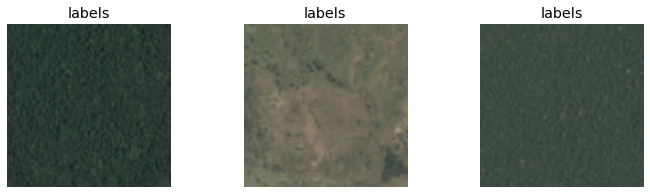

In [30]:

i = 0
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
for ax in axes.flat:  
    input = img.imread(files[i])
    ax.imshow(input)
    ax.set(title='labels')
    ax.axis('off')
    i += 1 
plt.show()



#### S1b. Planet_2k data  
Working locally from Ubuntu fastai20 conda env.  
Data saved to "gdrive/Colab Notebooks/data/planet_2k" locally.  

In [ ]:
# set path to planet-2k folder  
# C:\Users\jyoon\gdrive\Colab Notebooks\data\planet_2k
# location: Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k')  

path2k = Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k')
path2k.ls()

(#4) [Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k/test'),Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k/train'),Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k/train_classes_2k.csv'),Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k/train_classes_2k.gsheet')]

In [ ]:
Path.BASE_PATH = path2k
path2k.ls()

(#4) [Path('test'),Path('train'),Path('train_classes_2k.csv'),Path('train_classes_2k.gsheet')]

In [ ]:
csv2k = path2k/'train_classes_2k.csv'
print(csv2k)


/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k/train_classes_2k.csv


In [ ]:
df2k = pd.read_csv(csv2k)
#df2k.tail()
df2k.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [ ]:
# explore labels data frame  
# df2k.describe() 
# df2k.tags.unique()
# len(df2k)
# dk2k['tags'] == 'na'

#### S2b. Explore Planet_2k images

In [ ]:
files = get_image_files(path2k/'train')

2000

In [ ]:
files[0], files[1], files[2], files[3], files[4] 

(Path('train/train_0.jpg'),
 Path('train/train_1.jpg'),
 Path('train/train_10.jpg'),
 Path('train/train_100.jpg'),
 Path('train/train_1000.jpg'))

In [ ]:
from PIL import Image

im
im
im


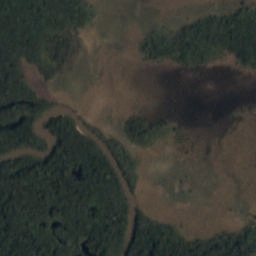

In [ ]:
# We can open an image with the Python Imaging Library's Image class
imlist = []
for i in [0, 1, 2]:
    im = Image.open(files[i]).convert('RGB')
    print("im")
    imlist.append(im)
im    

In [ ]:
imlist

[<PIL.Image.Image image mode=RGB size=256x256 at 0x7FD48B7C9278>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x7FD49C04DDA0>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x7FD48B7E2780>]

In [ ]:
# how to show 3 images at once?  Use matplotlib.pyplot?
# After images loaded into dls, can use "dls.show_batch(3)"

#### S3a. DataBlock, DataLoaders, DLS  
Firt try loading PLANET_TINY into fastai dls.

#### S3b. DataBlock, DataLoaders, DLS  
Next load planet_2k images into fastai dls.  
Need img.convert('RGB'), part of dataloader I think. 